Membuat model SVM Classifier dengan data Pokemon
---

In [10]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import csv
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# Memuat dataset ke dalam dataframe
dataset = pd.read_csv ('pokemon.csv')
dataset

In [4]:
# Memisahkan fitur dengan label
set_data = dataset.iloc [:, 4:10]
kluster_data = dataset.iloc [:,12] 

# Menampilkan fitur dan label
print(set_data)
print (kluster_data)

     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0    45      49       49       65       65     45
1    60      62       63       80       80     60
2    80      82       83      100      100     80
3    80     100      123      122      120     80
4    39      52       43       60       50     65
..   ..     ...      ...      ...      ...    ...
979  61     123       60       60       50    136
980  40      38       35       54       35     40
981  75      98       70      114       70     75
982  75      98       70      114       70     75
983  50      65       45       50       50     45

[984 rows x 6 columns]
0      0
1      0
2      1
3      1
4      0
      ..
979    2
980    0
981    2
982    2
983    0
Name: kluster, Length: 984, dtype: int64


In [7]:
# Membagi data training dan data test
x_train, x_test, y_train, y_test = train_test_split(set_data, kluster_data, test_size=0.25,random_state=150)

In [8]:
# Membuat SVM Classifier dengan Linear Kernel
model_s = svm.SVC(kernel='linear')
model_s.fit(x_train, y_train)
y_pred = model_s.predict(x_test)

In [11]:
# Melihat performa model dengan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       134
           1       0.98      1.00      0.99        50
           2       0.97      0.98      0.98        62

    accuracy                           0.98       246
   macro avg       0.98      0.99      0.98       246
weighted avg       0.98      0.98      0.98       246



In [42]:
# Menguji model dengan memasukkan data baru
hp = 100
a = 90
d =  95
sa = 90
sd = 90
s = 90

prediksi = model_s.predict([[hp,a,d,sa,sd,s]])
print('pokemon ini termasuk ke dalam kelompok kluster ' + str(prediksi))

pokemon ini termasuk ke dalam kelompok kluster [1]


Membuat model KNN Classifier dengan data Pokemon
---

In [24]:
# Import library yang dibutuhkan
import pandas as pd
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [22]:
# Membagi data train dan data test dengan data test sebesar 25%
x_train, x_test, y_train, y_test = train_test_split(set_data, kluster_data, test_size=0.25,random_state=150)

In [23]:
# Membuat model KNN classifier dengan jumlah neighbor 1
model_k = KNeighborsClassifier(n_neighbors=1)
model_k.fit(x_train, y_train)
y_pred = model_k.predict(x_test)

In [25]:
# Melihat performa model dengan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       134
           1       0.93      0.80      0.86        50
           2       0.83      0.89      0.86        62

    accuracy                           0.91       246
   macro avg       0.90      0.88      0.89       246
weighted avg       0.91      0.91      0.91       246



Menentukan Nilai K untuk model KNN
---

In [26]:
# Import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt

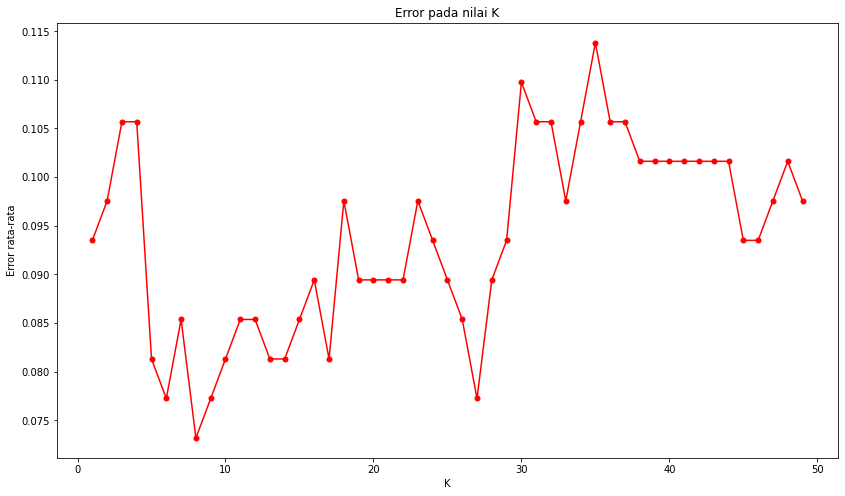

In [43]:
# Membuat list untuk memuat error model dari K=1 sampai K=50
error = []
for i in range(1, 50):
    model_k = KNeighborsClassifier(n_neighbors=i)
    model_k.fit(x_train, y_train)
    y_pred = model_k.predict(x_test)
    error.append(np.mean(y_pred != y_test))

# Membuat plot dengan list 'error'
plt.figure(1, figsize=(14, 8))  
plt.plot(range(1, 50), error, color='red', marker='o', markersize=5)
plt.title('Error pada nilai K')  
plt.xlabel('K')  
plt.ylabel('Error rata-rata')
plt.show()